<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/classification_challanges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset

In [24]:
fmnist_dataset = keras.datasets.fashion_mnist

In [25]:
(X_train, y_train), (X_test, y_test) = fmnist_dataset.load_data()

In [26]:
print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [27]:
X_train, X_test = X_train/255.0, X_test/255.0

## Define Model with different initialization

In [28]:
## model with He initialization
initializer_he = keras.initializers.HeNormal()

model_he_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [29]:
model_he_init.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
weight, bias = model_he_init.layers[1].get_weights()
print(weight)
print(bias)

[[ 0.02641546 -0.00139862 -0.00200192 ... -0.05685334 -0.07950936
   0.01277088]
 [ 0.05812413  0.01864111 -0.03341821 ... -0.01892053 -0.03236082
   0.06069363]
 [-0.04196425  0.02103832  0.0010538  ...  0.01289375 -0.0350347
   0.05472209]
 ...
 [-0.01461894  0.07233442  0.05673173 ... -0.0132202  -0.09754409
   0.01708194]
 [ 0.0269899   0.00506098 -0.03621528 ...  0.07540133 -0.09601785
   0.07682928]
 [-0.07557031 -0.02990237 -0.01553066 ... -0.11383343  0.01897852
  -0.09524626]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [31]:
model_he_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
##fit model
history_he_init = model_he_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.8350 - accuracy: 0.7205 - val_loss: 0.5687 - val_accuracy: 0.8004
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5203 - accuracy: 0.8183 - val_loss: 0.4967 - val_accuracy: 0.8241
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4696 - accuracy: 0.8355 - val_loss: 0.4637 - val_accuracy: 0.8326
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4406 - accuracy: 0.8447 - val_loss: 0.4436 - val_accuracy: 0.8447
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4203 - accuracy: 0.8527 - val_loss: 0.4390 - val_accuracy: 0.8494
Epoch 6/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4045 - accuracy: 0.8583 - val_loss: 0.4445 - val_accuracy: 0.8409
Epoch 7/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8626 - val_loss: 0.4067 - val_accuracy:

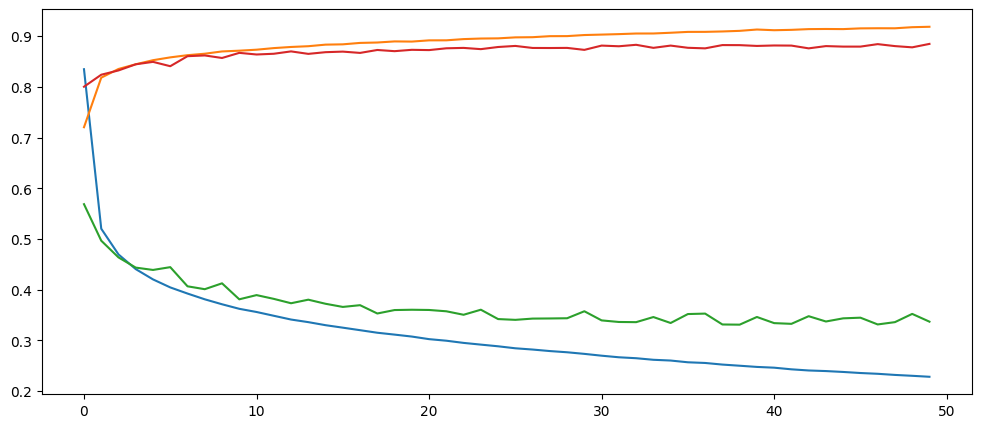

In [33]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_he_init.history["loss"] , label="train loss")
ax.plot(history_he_init.history["accuracy"], label="train accuracy")
ax.plot(history_he_init.history["val_loss"], label="validation loss")
ax.plot(history_he_init.history["val_accuracy"], label="validation accuracy")

In [34]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_lecun_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="selu", kernel_initializer= initializer_lecun),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [35]:
model_lecun_init.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
weight_lecun, bias_lecun = model_lecun_init.layers[1].get_weights()
print(weight_lecun)
print(bias_lecun)

[[-0.04055018  0.02760741  0.05090987 ... -0.02957002  0.04022158
  -0.0023446 ]
 [ 0.07958929  0.00672652  0.00525461 ...  0.01463928  0.0157904
  -0.05078486]
 [ 0.06474196 -0.04495558 -0.03652712 ...  0.03131699 -0.0284327
  -0.03121224]
 ...
 [ 0.0499844   0.03414567  0.02402855 ... -0.0590873   0.03114046
   0.02443625]
 [-0.02550794  0.05040457 -0.00880151 ... -0.01039138  0.02062087
  -0.01792355]
 [ 0.02424022 -0.01708785  0.00881144 ...  0.01537853  0.06745903
  -0.00253298]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [37]:
model_lecun_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [38]:
##fit model
history_lecun = model_lecun_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.6419 - accuracy: 0.7815 - val_loss: 0.5196 - val_accuracy: 0.8080
Epoch 2/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4683 - accuracy: 0.8345 - val_loss: 0.4742 - val_accuracy: 0.8241
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4339 - accuracy: 0.8473 - val_loss: 0.4287 - val_accuracy: 0.8434
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4122 - accuracy: 0.8536 - val_loss: 0.4293 - val_accuracy: 0.8448
Epoch 5/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3974 - accuracy: 0.8583 - val_loss: 0.4253 - val_accuracy: 0.8451
Epoch 6/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3854 - accuracy: 0.8625 - val_loss: 0.3964 - val_accuracy: 0.8557
Epoch 7/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.8671 - val_loss: 0.4006 - val_accuracy:

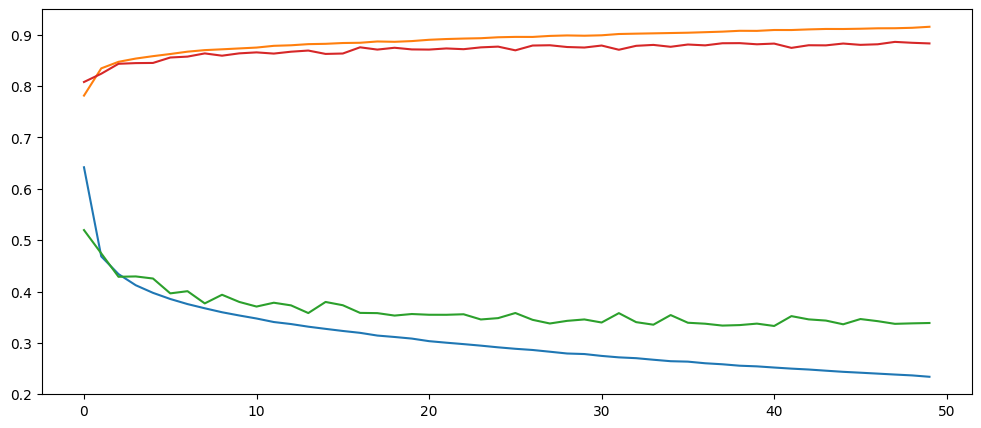

In [40]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_lecun.history["loss"] , label="train loss")
ax.plot(history_lecun.history["accuracy"], label="train accuracy")
ax.plot(history_lecun.history["val_loss"], label="validation loss")
ax.plot(history_lecun.history["val_accuracy"], label="validation accuracy")